In [1]:
from spuco.datasets import WILDSDatasetWrapper, SpuCoAnimals, UrbanCars, SpuCoSun, SpuCoMNIST

/home/yuyang/SpuCo/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yuyang/SpuCo/.conda/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/yuyang/SpuCo/.conda/lib/python3.10/site-packages/torchvision/t

In [11]:
from wilds import get_dataset 

transform=None
dataset = get_dataset(dataset="waterbirds", download=False, root_dir="/home/data")
train_data = dataset.get_subset(
        "train",
        transform=transform
    )
val_data = dataset.get_subset(
    "val",
    transform=transform
)
test_data = dataset.get_subset(
    "test",
    transform=transform
)
trainset = WILDSDatasetWrapper(dataset=train_data, metadata_spurious_label="background", verbose=True)
valset = WILDSDatasetWrapper(dataset=val_data, metadata_spurious_label="background", verbose=True)
testset = WILDSDatasetWrapper(dataset=test_data, metadata_spurious_label="background", verbose=True)

Partitioning data indices into groups: 100%|██████████| 5794/5794 [00:00<00:00, 2057207.94it/s]


In [12]:
print("train_data", len(trainset))
print("val_data", len(valset))
print("test_data", len(testset))

train_data 4795
val_data 1199
test_data 5794


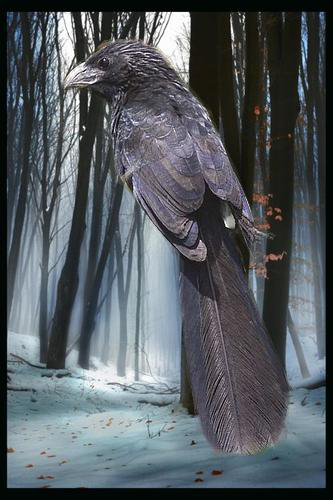

In [15]:
trainset[trainset.group_partition[(0,0)][0]][0]

In [16]:
sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) 
    print(key, sizes[key])

(0, 0) 3498
(0, 1) 184
(1, 0) 56
(1, 1) 1057


In [17]:
sizes = {}
for key in sorted(valset.group_partition.keys()):
    sizes[key] = len(valset.group_partition[key]) 
    print(key, sizes[key])

(0, 0) 467
(0, 1) 466
(1, 0) 133
(1, 1) 133


In [18]:
sizes = {}
for key in sorted(testset.group_partition.keys()):
    sizes[key] = len(testset.group_partition[key]) 
    print(key, sizes[key])

(0, 0) 2255
(0, 1) 2255
(1, 0) 642
(1, 1) 642


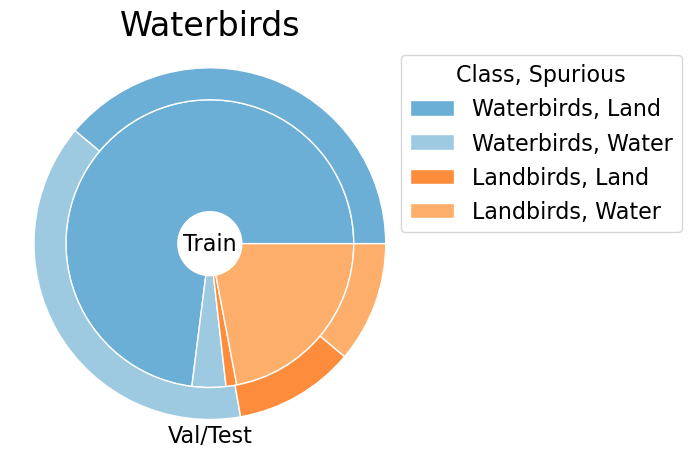

In [69]:
import matplotlib.pyplot as plt
import numpy as np

title = "Waterbirds"

# Training data
train_vals = []
sizes = {(0, 0): 1.2, (0, 1): 22, (1, 0): 73, (1, 1): 3.8}  # Sizes for train data
num_classes = 2
num_spurious = 2
for i in range(num_classes)[::-1]:
    train_vals.append([])
    for j in range(num_spurious):
        key = (i, j)
        if key in sizes:
            train_vals[-1].append(sizes[key])
train_vals = np.array(train_vals)
train_total = np.sum(train_vals)

# Validation/Test data
val_test_vals = [38.9, 38.9, 11.1, 11.1]  # Example proportions for the val/test data
val_test_total = np.sum(val_test_vals)

# Colors and figure settings
cmap = plt.colormaps["tab20c"]
inner_colors = cmap([1, 2, 5, 6, 9, 10])

fig, ax = plt.subplots()

# Plot the main pie chart (Train)
train_pie = ax.pie(train_vals.flatten(), radius=0.9, colors=inner_colors,
                   wedgeprops=dict(width=0.7, edgecolor='w'))

# Plot the outer ring (Val/Test)
val_test_pie = ax.pie(val_test_vals, radius=1.1, colors=inner_colors[:len(val_test_vals)],
                      wedgeprops=dict(width=0.2, edgecolor='w'))

# Label the regions
ax.text(0, 0, 'Train', horizontalalignment='center', verticalalignment='center', fontsize=16)
ax.text(0, -1.2, 'Val/Test', horizontalalignment='center', verticalalignment='center', fontsize=16)

# Titles and legend
plt.title(title, fontsize=24)
legend_labels = ["Waterbirds, Land", "Waterbirds, Water", "Landbirds, Land", "Landbirds, Water"]
ax.legend(handles=train_pie[0], labels=legend_labels, title='Class, Spurious', loc='upper left', bbox_to_anchor=(0.95, 1), title_fontsize=16, fontsize=16)

plt.tight_layout()
plt.savefig("waterbirds_sizes.pdf", bbox_inches='tight')


In [10]:
dataset = get_dataset(dataset="celebA", download=False, root_dir="/home/data")
train_data = dataset.get_subset(
        "train",
        transform=transform
    )
val_data = dataset.get_subset(
    "val",
    transform=transform
)
test_data = dataset.get_subset(
    "test",
    transform=transform
)
trainset = WILDSDatasetWrapper(dataset=train_data, metadata_spurious_label="male", verbose=True)
valset = WILDSDatasetWrapper(dataset=val_data, metadata_spurious_label="male", verbose=True)
testset = WILDSDatasetWrapper(dataset=test_data, metadata_spurious_label="male", verbose=True)

print("train_data", len(trainset))
print("val_data", len(valset))
print("test_data", len(testset))

sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) 
    print(key, sizes[key])
    
val_sizes = {}
for key in sorted(valset.group_partition.keys()):
    val_sizes[key] = len(valset.group_partition[key]) 
    print(key, val_sizes[key])
    
test_sizes = {}
for key in sorted(testset.group_partition.keys()):
    test_sizes[key] = len(testset.group_partition[key]) 
    print(key, test_sizes[key])

Partitioning data indices into groups: 100%|██████████| 19962/19962 [00:00<00:00, 1771918.57it/s]

train_data 162770
val_data 19867
test_data 19962
(0, 0) 71629
(0, 1) 66874
(1, 0) 22880
(1, 1) 1387
(0, 0) 8535
(0, 1) 8276
(1, 0) 2874
(1, 1) 182
(0, 0) 9767
(0, 1) 7535
(1, 0) 2480
(1, 1) 180


Partitioning data indices into groups: 100%|██████████| 19962/19962 [00:00<00:00, 2602309.21it/s]
/tmp/ipykernel_2975440/4261131866.py:87: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


train_data 162770
val_data 19867
(0, 0) 0.4400626651102783
(0, 1) 0.4108496651717147
(1, 0) 0.1405664434478098
(1, 1) 0.008521226270197212
(0, 0) 0.4296068857905069
(0, 1) 0.4165701917753058
(1, 0) 0.1446620023153974
(1, 1) 0.009160920118789953
(0, 0) 0.489279631299469
(0, 1) 0.37746718765654746
(1, 0) 0.12423604849213506
(1, 1) 0.009017132551848512


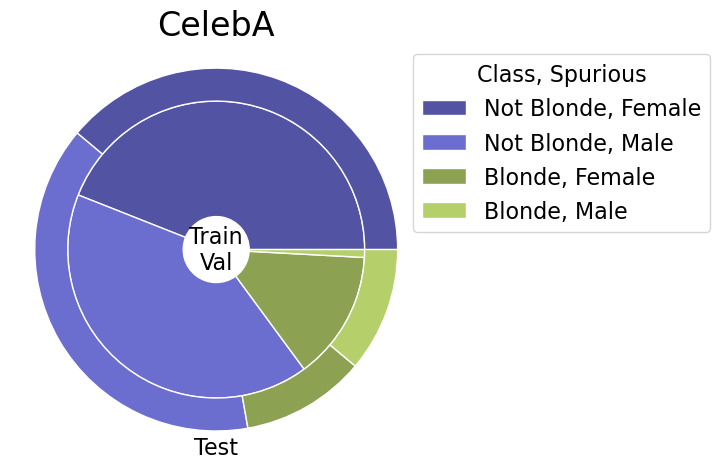

In [76]:


import matplotlib.pyplot as plt
import numpy as np

title="CelebA"
num_classes = 2
num_spurious = 2 

# Training data
train_vals = []
for i in range(num_classes):
    train_vals.append([])
    for j in range(num_spurious):
        if key in sizes:
            train_vals[-1].append(sizes[(i, j)])
train_vals = np.array(train_vals)
train_total = np.sum(train_vals)

# Test data
test_vals = []
for i in range(num_classes):
    test_vals.append([])
    for j in range(num_spurious):
        if key in sizes:
            test_vals[-1].append(test_sizes[(i, j)])

cmap = plt.colormaps["tab20b"]
outer_colors = cmap(np.arange(3) * 4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

fig, ax = plt.subplots()

# Plot the main pie chart (Train)
train_pie = ax.pie(train_vals.flatten(), radius=0.9, colors=inner_colors,
                   wedgeprops=dict(width=0.7, edgecolor='w'))

# Plot the outer ring (Val/Test)
val_test_pie = ax.pie(val_test_vals, radius=1.1, colors=inner_colors[:len(val_test_vals)],
                      wedgeprops=dict(width=0.2, edgecolor='w'))

# Label the regions
ax.text(0, 0, 'Train\nVal', horizontalalignment='center', verticalalignment='center', fontsize=16)
ax.text(0, -1.2, 'Test', horizontalalignment='center', verticalalignment='center', fontsize=16)

# Titles and legend
plt.title(title, fontsize=24)
plt.tight_layout()
legend_labels = ["Not Blonde, Female", "Not Blonde, Male", "Blonde, Female", "Blonde, Male"]
ax.legend(handles=train_pie[0], labels=legend_labels, title='Class, Spurious', loc='upper left', bbox_to_anchor=(0.95, 1), title_fontsize=16, fontsize=16)

plt.tight_layout()
plt.savefig("celeba_sizes.pdf", bbox_inches='tight')

In [13]:
from spuco.datasets import  UrbanCars, UrbanCarsSpuriousLabel

trainset=UrbanCars(root="/data/urbancars/", split="train", spurious_label_type=UrbanCarsSpuriousLabel.BOTH, verbose=True, transform=transform)
trainset.initialize()
valset=UrbanCars(root="/data/urbancars/", split="val", spurious_label_type=UrbanCarsSpuriousLabel.BOTH, verbose=True, transform=transform)
valset.initialize()
testset=UrbanCars(root="/data/urbancars/", split="test", spurious_label_type=UrbanCarsSpuriousLabel.BOTH, verbose=True, transform=transform)
testset.initialize()

Loading dataset


Creating group partitions: 100%|██████████| 7989/7989 [00:00<00:00, 1587544.16it/s]


Computing group weights
Done!
Loading dataset


Creating group partitions: 100%|██████████| 999/999 [00:00<00:00, 1100922.15it/s]


Computing group weights
Done!
Loading dataset


Creating group partitions: 100%|██████████| 1000/1000 [00:00<00:00, 1497430.92it/s]

Computing group weights
Done!


In [14]:
print("train_data", len(trainset))
print("val_data", len(valset))
print("test_data", len(testset))

sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) 
    print(key, sizes[key])
    
val_sizes = {}
for key in sorted(valset.group_partition.keys()):
    val_sizes[key] = len(valset.group_partition[key]) 
    print(key, val_sizes[key])
    
test_sizes = {}
for key in sorted(testset.group_partition.keys()):
    test_sizes[key] = len(testset.group_partition[key]) 
    print(key, test_sizes[key])

train_data 7989
val_data 999
test_data 1000
(0, (0, 0)) 3605
(0, (0, 1)) 189
(0, (1, 0)) 189
(0, (1, 1)) 10
(1, (0, 0)) 10
(1, (0, 1)) 190
(1, (1, 0)) 190
(1, (1, 1)) 3606
(0, (0, 0)) 125
(0, (0, 1)) 125
(0, (1, 0)) 125
(0, (1, 1)) 124
(1, (0, 0)) 125
(1, (0, 1)) 125
(1, (1, 0)) 125
(1, (1, 1)) 125
(0, (0, 0)) 125
(0, (0, 1)) 125
(0, (1, 0)) 125
(0, (1, 1)) 125
(1, (0, 0)) 125
(1, (0, 1)) 125
(1, (1, 0)) 125
(1, (1, 1)) 125


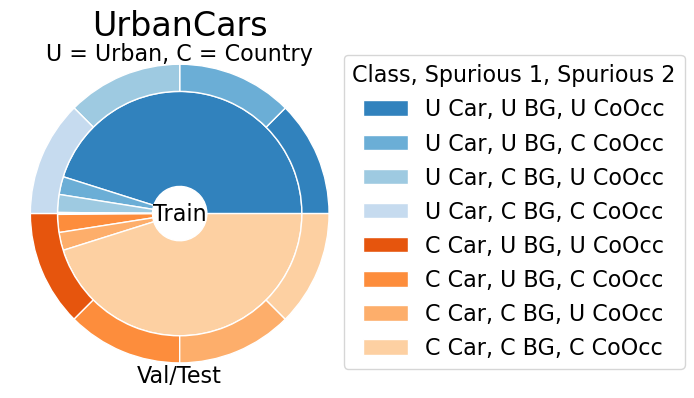

In [93]:
import matplotlib.pyplot as plt

title="UrbanCars"

cmap = plt.colormaps["tab20c"]
outer_colors = cmap([0, 4])
middle_colors = cmap([0, 1, 4, 5])
inner_colors = cmap([0, 1, 2, 3, 4, 5, 6, 7])

train_vals = list(sizes.values())
test_vals = list(test_sizes.values())

fig, ax = plt.subplots()

# Plot the main pie chart (Train)
train_pie = ax.pie(train_vals, radius=0.9, colors=inner_colors,
                   wedgeprops=dict(width=0.7, edgecolor='w'))

# Plot the outer ring (Val/Test)
val_test_pie = ax.pie(test_vals, radius=1.1, colors=inner_colors[:len(test_vals)],
                      wedgeprops=dict(width=0.2, edgecolor='w'))

# Label the regions
ax.text(0, 0, 'Train', horizontalalignment='center', verticalalignment='center', fontsize=16)
ax.text(0, -1.2, 'Val/Test', horizontalalignment='center', verticalalignment='center', fontsize=16)

# Titles and legend
plt.title(title, fontsize=24)
plt.text(0.5, 0.97, 'U = Urban, C = Country', ha='center', va='center', transform=plt.gca().transAxes, fontsize=16)
labels=["U Car, U BG, U CoOcc", "U Car, U BG, C CoOcc", "U Car, C BG, U CoOcc" , "U Car, C BG, C CoOcc", "C Car, U BG, U CoOcc", "C Car, U BG, C CoOcc", "C Car, C BG, U CoOcc" , "C Car, C BG, C CoOcc"]
ax.legend(handles=train_pie[0], labels=labels, title='Class, Spurious 1, Spurious 2', loc='upper left', bbox_to_anchor=(0.95, 1), title_fontsize=16, fontsize=16)

plt.tight_layout()
plt.savefig(f"{title.lower()}_sizes.pdf", bbox_inches='tight')


In [16]:
from spuco.datasets import SpuCoAnimals

trainset = SpuCoAnimals(
    root="/data",
    label_noise=0,
    split="train",
    transform=transform,
)
trainset.initialize()

valset = SpuCoAnimals(
    root="/data",
    label_noise=0,
    split="val",
    transform=transform,
)
valset.initialize()

testset = SpuCoAnimals(
    root="/data",
    label_noise=0,
    split="test",
    transform=transform,
)
testset.initialize()

print("train_data", len(trainset))
print("val_data", len(valset))
print("test_data", len(testset))

train_data 42000
val_data 2100
test_data 4000


train_data 42000
val_data 2100
(0, 0) 0.23809523809523808
(0, 1) 0.011904761904761904
(1, 0) 0.011904761904761904
(1, 1) 0.23809523809523808
(2, 2) 0.23809523809523808
(2, 3) 0.011904761904761904
(3, 2) 0.011904761904761904
(3, 3) 0.23809523809523808
(0, 0) 0.23809523809523808
(0, 1) 0.011904761904761904
(1, 0) 0.011904761904761904
(1, 1) 0.23809523809523808
(2, 2) 0.23809523809523808
(2, 3) 0.011904761904761904
(3, 2) 0.011904761904761904
(3, 3) 0.23809523809523808
(0, 0) 0.125
(0, 1) 0.125
(1, 0) 0.125
(1, 1) 0.125
(2, 2) 0.125
(2, 3) 0.125
(3, 2) 0.125
(3, 3) 0.125


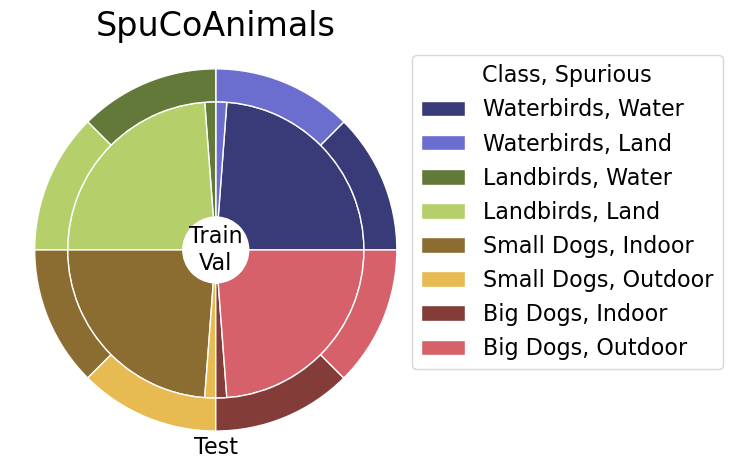

In [101]:


sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) / len(trainset)
    print(key, sizes[key])
    
val_sizes = {}
for key in sorted(valset.group_partition.keys()):
    val_sizes[key] = len(valset.group_partition[key]) / len(valset)
    print(key, val_sizes[key])
    
test_sizes = {}
for key in sorted(testset.group_partition.keys()):
    test_sizes[key] = len(testset.group_partition[key]) / len(testset)
    print(key, test_sizes[key])
    
import matplotlib.pyplot as plt
import numpy as np

title="SpuCoAnimals"

outer_sizes = [0.25, 0.25, 0.25, 0.25]
inner_sizes = list(sizes.values())

# Adjust the figure size
#    fig, ax = plt.subplots(figsize=(4,4))
size = 0.6

cmap = plt.colormaps["tab20b"]
outer_colors = cmap([0, 4, 8, 12])
inner_colors = cmap([0, 2, 4, 6, 8, 10, 12, 14])

train_vals = list(sizes.values())
test_vals = list(test_sizes.values())

fig, ax = plt.subplots()

# Plot the main pie chart (Train)
train_pie = ax.pie(train_vals, radius=0.9, colors=inner_colors,
                   wedgeprops=dict(width=0.7, edgecolor='w'))

# Plot the outer ring (Val/Test)
val_test_pie = ax.pie(test_vals, radius=1.1, colors=inner_colors[:len(test_vals)],
                      wedgeprops=dict(width=0.2, edgecolor='w'))

# Label the regions
ax.text(0, 0, 'Train\nVal', horizontalalignment='center', verticalalignment='center', fontsize=16)
ax.text(0, -1.2, 'Test', horizontalalignment='center', verticalalignment='center', fontsize=16)

# Titles and legend
plt.title(title, fontsize=24)
plt.tight_layout()
legend_labels=["Waterbirds, Water", "Waterbirds, Land", "Landbirds, Water", "Landbirds, Land", "Small Dogs, Indoor", "Small Dogs, Outdoor", "Big Dogs, Indoor", "Big Dogs, Outdoor"]
ax.legend(handles=train_pie[0], labels=legend_labels, title='Class, Spurious', loc='upper left', bbox_to_anchor=(0.95, 1), title_fontsize=16, fontsize=16)

plt.savefig(f"{title.lower()}_sizes.pdf", bbox_inches='tight')


In [15]:
title="SpuCoSun (Easy)"
root_dir = "/data/spucosun/10.21"

trainset = SpuCoSun(
    root=root_dir,
    split="train",
    transform=transform,
)
trainset.initialize()
print("train_data", len(trainset))

valset = SpuCoSun(
    root=root_dir,
    split="val",
    transform=transform,
)
valset.initialize()
print("val_data", len(valset))

testset = SpuCoSun(
    root=root_dir,
    split="test",
    transform=transform,
)
testset.initialize()
print("test_data", len(testset))

sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) 
    print(key, sizes[key])
    
val_sizes = {}
for key in sorted(valset.group_partition.keys()):
    val_sizes[key] = len(valset.group_partition[key]) 
    print(key, val_sizes[key])
    
test_sizes = {}
for key in sorted(testset.group_partition.keys()):
    test_sizes[key] = len(testset.group_partition[key]) 
    print(key, test_sizes[key])

train_data 28092
val_data 1612
test_data 4012
(0, 0) 6720
(0, 1) 101
(0, 2) 101
(0, 3) 101
(1, 0) 101
(1, 1) 6720
(1, 2) 101
(1, 3) 101
(2, 0) 101
(2, 1) 101
(2, 2) 6720
(2, 3) 101
(3, 0) 101
(3, 1) 101
(3, 2) 101
(3, 3) 6720
(0, 0) 100
(0, 1) 101
(0, 2) 101
(0, 3) 101
(1, 0) 101
(1, 1) 100
(1, 2) 101
(1, 3) 101
(2, 0) 101
(2, 1) 101
(2, 2) 100
(2, 3) 101
(3, 0) 101
(3, 1) 101
(3, 2) 101
(3, 3) 100
(0, 0) 250
(0, 1) 251
(0, 2) 251
(0, 3) 251
(1, 0) 251
(1, 1) 250
(1, 2) 251
(1, 3) 251
(2, 0) 251
(2, 1) 251
(2, 2) 250
(2, 3) 251
(3, 0) 251
(3, 1) 251
(3, 2) 251
(3, 3) 250


(0, 0) 0.2392140111063648
(0, 1) 0.003595329631211733
(0, 2) 0.003595329631211733
(0, 3) 0.003595329631211733
(1, 0) 0.003595329631211733
(1, 1) 0.2392140111063648
(1, 2) 0.003595329631211733
(1, 3) 0.003595329631211733
(2, 0) 0.003595329631211733
(2, 1) 0.003595329631211733
(2, 2) 0.2392140111063648
(2, 3) 0.003595329631211733
(3, 0) 0.003595329631211733
(3, 1) 0.003595329631211733
(3, 2) 0.003595329631211733
(3, 3) 0.2392140111063648
(0, 0) 0.062034739454094295
(0, 1) 0.06265508684863523
(0, 2) 0.06265508684863523
(0, 3) 0.06265508684863523
(1, 0) 0.06265508684863523
(1, 1) 0.062034739454094295
(1, 2) 0.06265508684863523
(1, 3) 0.06265508684863523
(2, 0) 0.06265508684863523
(2, 1) 0.06265508684863523
(2, 2) 0.062034739454094295
(2, 3) 0.06265508684863523
(3, 0) 0.06265508684863523
(3, 1) 0.06265508684863523
(3, 2) 0.06265508684863523
(3, 3) 0.062034739454094295
(0, 0) 0.06231306081754736
(0, 1) 0.06256231306081755
(0, 2) 0.06256231306081755
(0, 3) 0.06256231306081755
(1, 0) 0.0625623

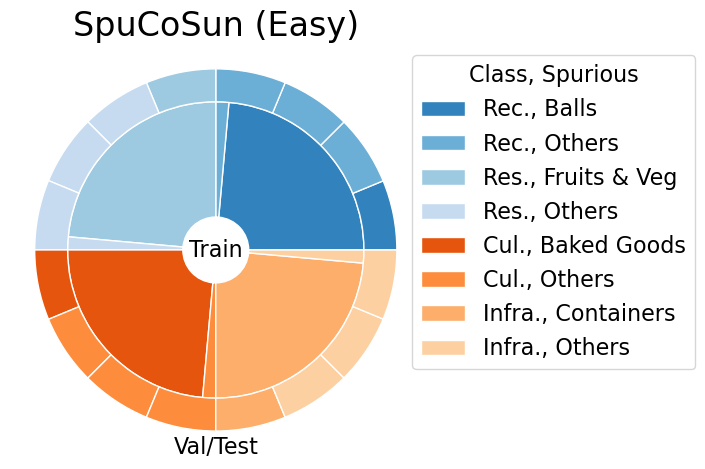

In [131]:


outer_sizes = [0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736]
inner_sizes = [0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648]

    
new_inner_sizes = [0.2392140111063648, 0.003595329631211733*4,
                    0.2392140111063648, 0.003595329631211733*4,
                    0.2392140111063648, 0.003595329631211733*4,
                    0.2392140111063648, 0.003595329631211733*4]

cmap = plt.colormaps["tab20c"]
inner_colors = cmap(np.arange(10))
outer_colors = inner_colors[[0, 1, 1, 1,
                            2, 3, 3, 3,
                            4, 5, 5, 5,
                            6, 7, 7, 7]]

fig, ax = plt.subplots()

# Plot the main pie chart (Train)
train_pie = ax.pie(new_inner_sizes, radius=0.9, colors=inner_colors,
                   wedgeprops=dict(width=0.7, edgecolor='w'))

# Plot the outer ring (Val/Test)
val_test_pie = ax.pie(outer_sizes, radius=1.1, colors=outer_colors,
                      wedgeprops=dict(width=0.2, edgecolor='w'))

# Label the regions
ax.text(0, 0, 'Train', horizontalalignment='center', verticalalignment='center', fontsize=16)
ax.text(0, -1.2, 'Val/Test', horizontalalignment='center', verticalalignment='center', fontsize=16)

#plt.set(aspect="equal", title=title)
# Add legends without labels on the pie chart
plt.title(title, fontsize=24)
plt.tight_layout()
legend_labels=["Rec., Balls", "Rec., Others", "Res., Fruits & Veg", "Res., Others", "Cul., Baked Goods", "Cul., Others", "Infra., Containers", "Infra., Others"]
ax.legend(handles=train_pie[0], labels=legend_labels, title='Class, Spurious', loc='upper left', bbox_to_anchor=(0.95, 1), title_fontsize=16, fontsize=16)

plt.savefig(f"{title.lower()}_sizes.pdf", bbox_inches='tight')


In [109]:
outer_sizes = list(test_sizes.values())
print(outer_sizes)
inner_sizes = list(sizes.values())
print(inner_sizes)

[0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736]
[0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648]


In [5]:
title="SpuCoSun (Hard)"
root_dir = "/data/spucosun/10.0"

trainset = SpuCoSun(
    root=root_dir,
    split="train",
    transform=transform,
)
trainset.initialize()
print("train_data", len(trainset))

valset = SpuCoSun(
    root=root_dir,
    split="val",
    transform=transform,
)
valset.initialize()

testset = SpuCoSun(
    root=root_dir,
    split="test",
    transform=transform,
)
testset.initialize()

sizes = {}
for key in sorted(trainset.group_partition.keys()):
    sizes[key] = len(trainset.group_partition[key]) 
    print(key, sizes[key])
    
val_sizes = {}
for key in sorted(valset.group_partition.keys()):
    val_sizes[key] = len(valset.group_partition[key]) 
    print(key, val_sizes[key])
    
test_sizes = {}
for key in sorted(testset.group_partition.keys()):
    test_sizes[key] = len(testset.group_partition[key]) 
    print(key, test_sizes[key])
    
outer_sizes = list(test_sizes.values())
print(outer_sizes)
inner_sizes = list(sizes.values())
print(inner_sizes)

train_data 28092
(0, 0) 6720
(0, 1) 101
(0, 2) 101
(0, 3) 101
(1, 0) 101
(1, 1) 6720
(1, 2) 101
(1, 3) 101
(2, 0) 101
(2, 1) 101
(2, 2) 6720
(2, 3) 101
(3, 0) 101
(3, 1) 101
(3, 2) 101
(3, 3) 6720
(0, 0) 100
(0, 1) 101
(0, 2) 101
(0, 3) 101
(1, 0) 101
(1, 1) 100
(1, 2) 101
(1, 3) 101
(2, 0) 101
(2, 1) 101
(2, 2) 100
(2, 3) 101
(3, 0) 101
(3, 1) 101
(3, 2) 101
(3, 3) 100
(0, 0) 250
(0, 1) 251
(0, 2) 251
(0, 3) 251
(1, 0) 251
(1, 1) 250
(1, 2) 251
(1, 3) 251
(2, 0) 251
(2, 1) 251
(2, 2) 250
(2, 3) 251
(3, 0) 251
(3, 1) 251
(3, 2) 251
(3, 3) 250
[250, 251, 251, 251, 251, 250, 251, 251, 251, 251, 250, 251, 251, 251, 251, 250]
[6720, 101, 101, 101, 101, 6720, 101, 101, 101, 101, 6720, 101, 101, 101, 101, 6720]


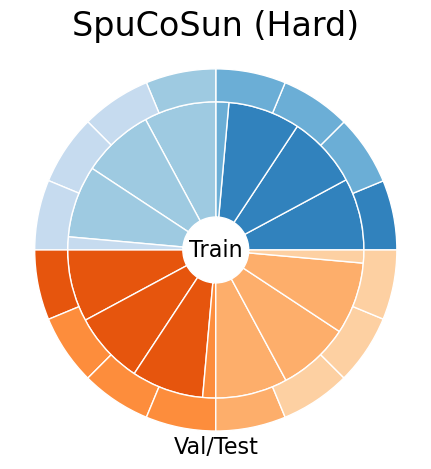

In [11]:
outer_sizes = [0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06256231306081755, 0.06231306081754736]
inner_sizes = [0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.003595329631211733, 0.2392140111063648]

    
new_inner_sizes = [0.2392140111063648/3, 0.2392140111063648/3, 0.2392140111063648/3, 0.003595329631211733*4,
                    0.2392140111063648/3, 0.2392140111063648/3, 0.2392140111063648/3, 0.003595329631211733*4,
                    0.2392140111063648/3, 0.2392140111063648/3, 0.2392140111063648/3, 0.003595329631211733*4,
                    0.2392140111063648/3, 0.2392140111063648/3, 0.2392140111063648/3, 0.003595329631211733*4]
import matplotlib.pyplot as plt
import numpy as np
cmap = plt.colormaps["tab20c"]
inner_colors = cmap(np.arange(10))
new_inner_colors = inner_colors[[0, 0, 0, 1,
                            2, 2, 2, 3,
                            4, 4, 4, 5,
                            6, 6, 6, 7]]
outer_colors = inner_colors[[0, 1, 1, 1,
                            2, 3, 3, 3,
                            4, 5, 5, 5,
                            6, 7, 7, 7]]

fig, ax = plt.subplots()

# Plot the main pie chart (Train)
train_pie = ax.pie(new_inner_sizes, radius=0.9, colors=new_inner_colors,
                   wedgeprops=dict(width=0.7, edgecolor='w'))

# Plot the outer ring (Val/Test)
val_test_pie = ax.pie(outer_sizes, radius=1.1, colors=outer_colors,
                      wedgeprops=dict(width=0.2, edgecolor='w'))

# Label the regions
ax.text(0, 0, 'Train', horizontalalignment='center', verticalalignment='center', fontsize=16)
ax.text(0, -1.2, 'Val/Test', horizontalalignment='center', verticalalignment='center', fontsize=16)

#plt.set(aspect="equal", title=title)
# Add legends without labels on the pie chart
plt.title(title, fontsize=24)
plt.tight_layout()
legend_labels=["Rec., Balls", "Rec., Others", "Res., Fruits & Veg", "Res., Others", "Cul., Baked Goods", "Cul., Others", "Infra., Containers", "Infra., Others"]
# ax.legend(handles=train_pie[0], labels=legend_labels, title='Class, Spurious', loc='upper left', bbox_to_anchor=(0.95, 1), title_fontsize=16, fontsize=16)

plt.savefig(f"{title.lower()}_sizes.pdf", bbox_inches='tight')

In [41]:
import numpy as np 

data = [
    {"Method": "ERM", "Waterbirds": {"WG": 80.1, "Average": 97.8}, "CelebA": {"WG": 79.4, "Average": 91.7}, "UrbanCars": {"WG": 56.8, "Average": 97.0}, "SpuCoAnimals (CLIP)": {"WG": 45.4, "Average": 76.8}, "SpuCoSun (Easy)": {"WG": 20.2, "Average": 66.0}, "SpuCoSun (Hard)": {"WG": 44.3, "Average": 99.8}},
    {"Method": "EIIL", "Waterbirds": {"WG": 83.5, "Average": 94.2}, "CelebA": {"WG": "F", "Average": "F"}, "UrbanCars": {"WG": 79.2, "Average": 91.5}, "SpuCoAnimals (CLIP)": {"WG": "R", "Average": "R"}, "SpuCoSun (Easy)": {"WG": 32.1, "Average": 80.9}, "SpuCoSun (Hard)": {"WG": 43.7, "Average": 99.7}},
    {"Method": "JTT", "Waterbirds": {"WG": 83.1, "Average": 90.6}, "CelebA": {"WG": "F", "Average": "F"}, "UrbanCars": {"WG": 76.0, "Average": 91.8}, "SpuCoAnimals (CLIP)": {"WG": "R", "Average": "R"}, "SpuCoSun (Easy)": {"WG": "HY", "Average": "HY"}, "SpuCoSun (Hard)": {"WG": 75.1, "Average": 97.7}},
    {"Method": "SPARE", "Waterbirds": {"WG": 91.6, "Average": 96.2}, "CelebA": {"WG": "YX", "Average": "YX"}, "UrbanCars": {"WG": 76.0, "Average": 96.1}, "SpuCoAnimals (CLIP)": {"WG": 23.2, "Average": 94.7}, "SpuCoSun (Easy)": {"WG": 40.5, "Average": 79.7}, "SpuCoSun (Hard)": {"WG": 94.1, "Average": 97.7}},
    {"Method": "SSA", "Waterbirds": {"WG": 85.1, "Average": 96.7}, "CelebA": {"WG": 89.8, "Average": 91.0}, "UrbanCars": {"WG": "YY", "Average": "YY"}, "SpuCoAnimals (CLIP)": {"WG": 50.4, "Average": 89.7}, "SpuCoSun (Easy)": {"WG": 22.6, "Average": 39.2}, "SpuCoSun (Hard)": {"WG": 97.1, "Average": 92.2}},
    {"Method": r"DFR$^{Val}_{Tr}$", "Waterbirds": {"WG": 90.6, "Average": 93.4}, "CelebA": {"WG": 88.3, "Average": 91.3}, "UrbanCars": {"WG": 79.2, "Average": 92.6}, "SpuCoAnimals (CLIP)": {"WG": 63.6, "Average": 85.1}, "SpuCoSun (Easy)": {"WG": 38.1, "Average": 67.9}, "SpuCoSun (Hard)": {"WG": 92.0, "Average": 98.1}},
    # {"Method": "DISPEL", "Waterbirds": {"WG": 92.7, "Average": 94.4}, "CelebA": {"WG": 88.5, "Average": 91.0}, "UrbanCars": {"WG": 80.0, "Average": 92.2}, "SpuCoAnimals (CLIP)": {"WG": "R", "Average": "R"}, "SpuCoSun (Easy)": {"WG": 41.6, "Average": 77.4}, "SpuCoSun (Hard)": {"WG": 92.5, "Average": 98.2}},
    {"Method": "GB", "Waterbirds": {"WG": 88.1, "Average": 95.5}, "CelebA": {"WG": "F", "Average": "F"}, "UrbanCars": {"WG": 84.8, "Average": 93.3}, "SpuCoAnimals (CLIP)": {"WG": "R", "Average": "R"}, "SpuCoSun (Easy)": {"WG": 46.4, "Average": 73.2}, "SpuCoSun (Hard)": {"WG": 92.2, "Average": 96.2}},
    {"Method": "GDRO", "Waterbirds": {"WG": 85.7, "Average": 94.3}, "CelebA": {"WG": 89.4, "Average": 91.4}, "UrbanCars": {"WG": 80.0, "Average": 90.9}, "SpuCoAnimals (CLIP)": {"WG": 54.0, "Average": 72.4}, "SpuCoSun (Easy)": {"WG": 47.6, "Average": 73.4}, "SpuCoSun (Hard)": {"WG": 91.4, "Average": 96.9}},
    {"Method": "PDE", "Waterbirds": {"WG": 90.3, "Average": 92.4}, "CelebA": {"WG": 91.0, "Average": 92.0}, "UrbanCars": {"WG": "YY", "Average": "YY"}, "SpuCoAnimals (CLIP)": {"WG": 70.6, "Average": 81.5}, "SpuCoSun (Easy)": {"WG": 56.0, "Average": 71.7}, "SpuCoSun (Hard)": {"WG": 88.4, "Average": 91.4}}
]

processed_data = []
method_names = []
for method in data:
    method_names.append(method["Method"])
print(method_names)
dataset_names = []
for dataset in ['Waterbirds', 'CelebA', 'UrbanCars', 'SpuCoAnimals (CLIP)', 'SpuCoSun (Easy)', 'SpuCoSun (Hard)']:
    dataset_names.append(dataset)
    processed_data.append([])
    for method in data:
        if type(method[dataset]["WG"]) == str:
            processed_data[-1].append(-10)
        else:
            processed_data[-1].append(method[dataset]["WG"])
processed_data = np.array(processed_data).T
print(processed_data)
        

['ERM', 'EIIL', 'JTT', 'SPARE', 'SSA', 'DFR$^{Val}_{Tr}$', 'GB', 'GDRO', 'PDE']
[[ 80.1  79.4  56.8  45.4  20.2  44.3]
 [ 83.5 -10.   79.2 -10.   32.1  43.7]
 [ 83.1 -10.   76.  -10.  -10.   75.1]
 [ 91.6 -10.   76.   23.2  40.5  94.1]
 [ 85.1  89.8 -10.   50.4  22.6  97.1]
 [ 90.6  88.3  79.2  63.6  38.1  92. ]
 [ 88.1 -10.   84.8 -10.   46.4  92.2]
 [ 85.7  89.4  80.   54.   47.6  91.4]
 [ 90.3  91.  -10.   70.6  56.   88.4]]


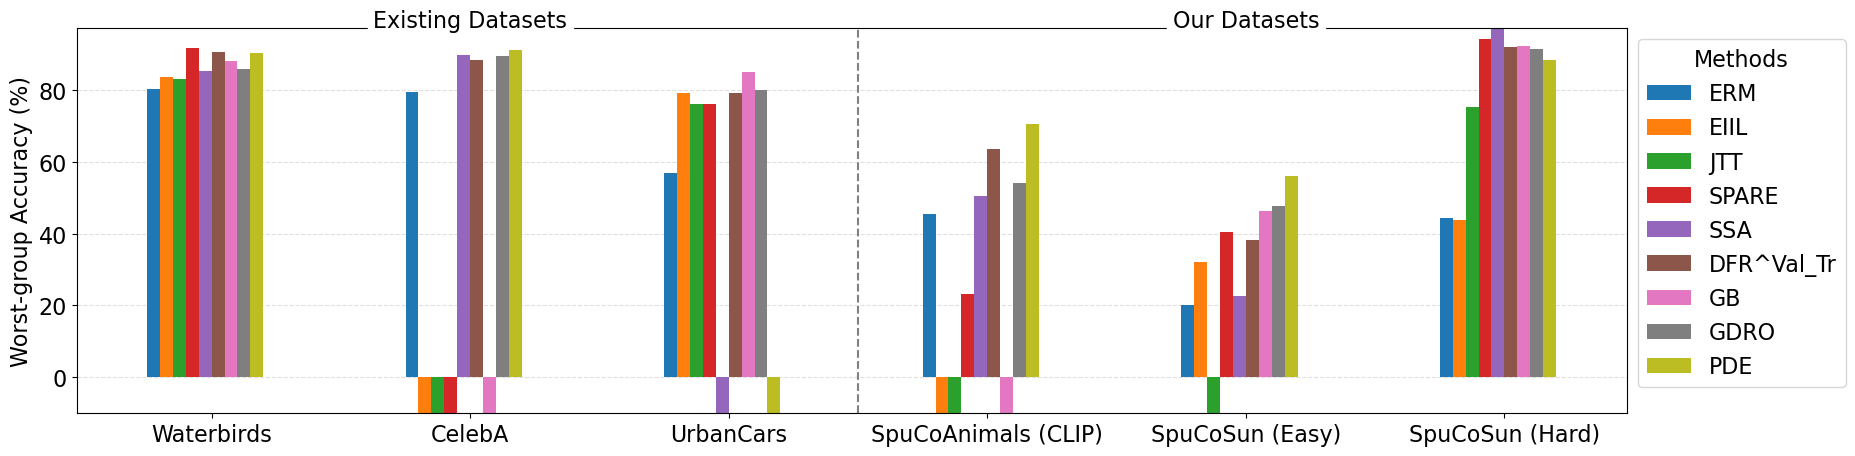

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming dataset_names, method_names, processed_data, and error_data are defined earlier

x = np.arange(len(dataset_names)) # the label locations
num_methods = len(method_names)
width = 0.05  # the width of the bars, adjust if necessary to fit all methods

# Increase the figure size for better visibility
fig, ax = plt.subplots(figsize=(20, 5))

# Plot bars
for i, (attribute, measurement) in enumerate(zip(method_names, processed_data)):
    offset = width * (i - num_methods / 2)
    rects = ax.bar(x + offset, measurement, width, label=attribute)

# Set labels and titles
ax.set_ylabel('Worst-group Accuracy (%)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(dataset_names, fontsize=16)
# set ytick size
ax.tick_params(axis='y', labelsize=16)

# Draw vertical lines for dividers
# Assuming divider_indices is a list of indices where the vertical lines should be drawn
divider_indices = [2.5]  # Change these indices as per your datasets
for idx in divider_indices:
    ax.axvline(x=idx, color='grey', linestyle='--')

# Add text annotations for categories
# Assuming category_positions is a dictionary with categories and their positions
category_positions = {'Existing Datasets': 1, 'Our Datasets': 4}
for category, pos in category_positions.items():
    ax.text(pos, ax.get_ylim()[1] * 1, category, ha='center', va='top', fontsize=16, backgroundcolor='white')

# Add grid only on y-axis and behind the bars
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.set_axisbelow(True)

# Set the y-axis range to include negative values
ax.set_ylim(min(-10, min(np.array(processed_data).flatten())), max(20, max(np.array(processed_data).flatten())))

# Place the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Methods', title_fontsize=16, fontsize=16)
# Show the plot
plt.show()
fig.savefig(f"main_results.pdf", bbox_inches='tight')


/tmp/ipykernel_650353/2101670020.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return [plt.cm.get_cmap(base_color)(0.8 * i/n) for i in range(1, n+1)]


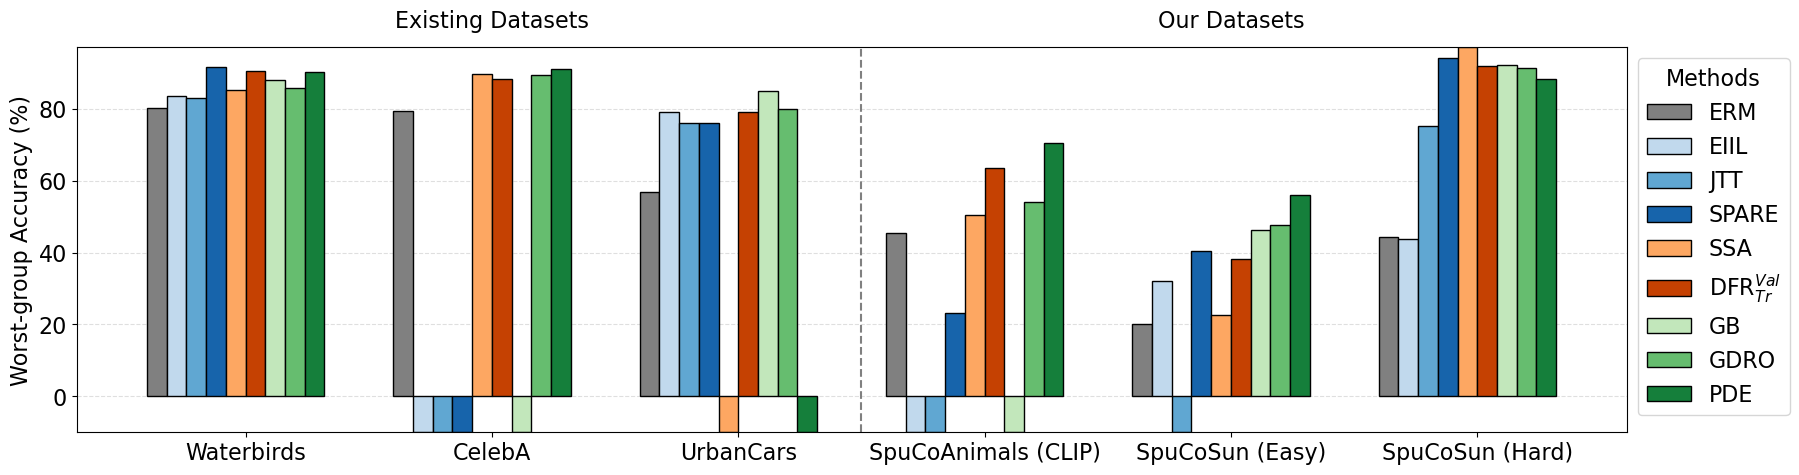

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming dataset_names, method_names, processed_data, and error_data are defined earlier
x = np.arange(len(dataset_names))  # the label locations
num_methods = len(method_names)
width = 0.08  # the width of the bars, adjust if necessary to fit all methods

# Increase the figure size for better visibility
fig, ax = plt.subplots(figsize=(20, 5))

# Define a custom color palette using shades of the same color
def get_color_shades(base_color, n):
    """ Generate n shades of the given base color """
    return [plt.cm.get_cmap(base_color)(0.8 * i/n) for i in range(1, n+1)]

# Generate color shades for each group
green_shades = get_color_shades('Greens', 3)  # For second, third, and fourth category
red_shades = get_color_shades('Oranges', 2)  # For fifth and sixth category
blue_shades = get_color_shades('Blues', 3)  # For seventh, eighth, and ninth category

# Assign colors to methods accordingly (assumes 9 methods for exact match, adjust as needed)
color_palette = ['grey'] + blue_shades + red_shades + green_shades
if len(method_names) > len(color_palette):
    # Extend the color palette if there are more methods than colors defined
    color_palette += ['grey'] * (len(method_names) - len(color_palette))

# Plot bars
for i, (attribute, measurement) in enumerate(zip(method_names, processed_data)):
    offset = width * (i - num_methods / 2)
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color_palette[i], edgecolor='black')

# Set labels and titles
ax.set_ylabel('Worst-group Accuracy (%)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(dataset_names, fontsize=16)
ax.tick_params(axis='y', labelsize=16)

# Draw vertical lines for dividers
divider_indices = [2.5]  # Change these indices as per your datasets
for idx in divider_indices:
    ax.axvline(x=idx, color='grey', linestyle='--')

# Add text annotations for categories
category_positions = {'Existing Datasets': 1, 'Our Datasets': 4}
for category, pos in category_positions.items():
    ax.text(pos, ax.get_ylim()[1] * 1.05, category, ha='center', va='top', fontsize=16, backgroundcolor='white')

# Add grid only on y-axis and behind the bars
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.set_axisbelow(True)

# Set the y-axis range to include negative values
ax.set_ylim(min(-10, min(np.array(processed_data).flatten())), max(20, max(np.array(processed_data).flatten())))

# Place the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Methods', title_fontsize=16, fontsize=16)

# Show the plot
plt.show()
fig.savefig(f"main_results.pdf", bbox_inches='tight')


/tmp/ipykernel_1092041/377990122.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return [plt.cm.get_cmap(base_color)(0.8 * i/n) for i in range(1, n+1)]


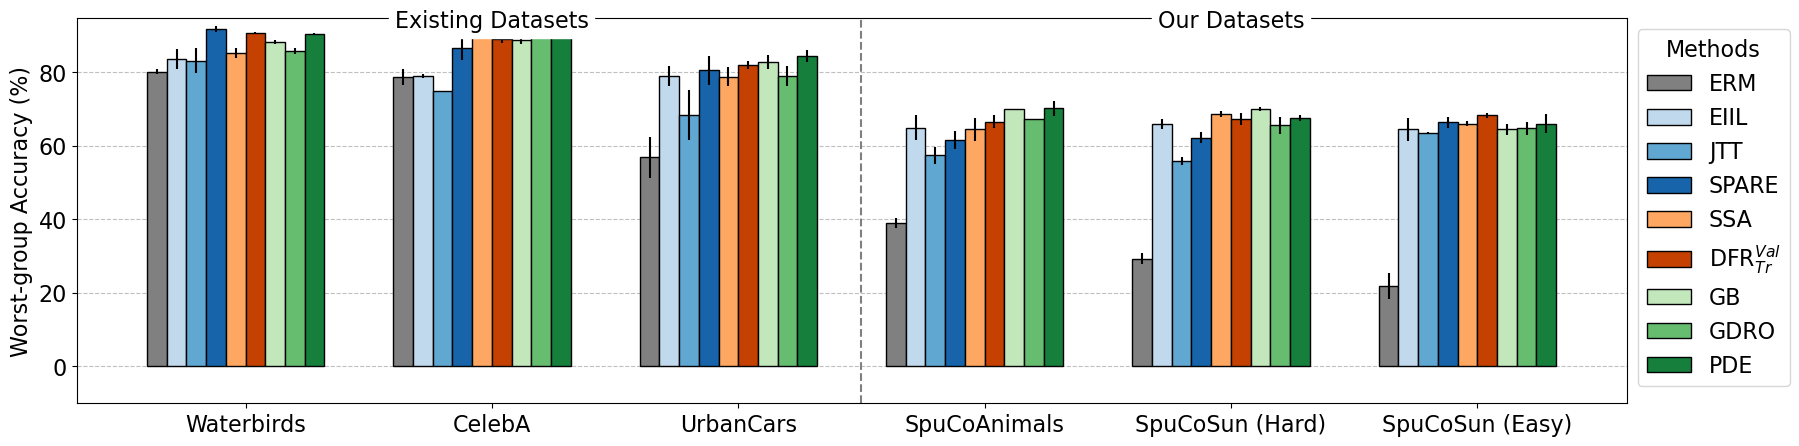

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Datasets
dataset_names = ['Waterbirds', 'CelebA', 'UrbanCars', 'SpuCoAnimals', 'SpuCoSun (Hard)', 'SpuCoSun (Easy)']

# Method names from the table
method_names = ['ERM', 'EIIL', 'JTT', 'SPARE', 'SSA', r"DFR$^{Val}_{Tr}$", 'GB', 'GDRO', 'PDE']

# Processed data (WG accuracy) and error data extracted from the LaTeX table
# Here I put placeholder arrays for each method, assuming 6 datasets.
# Replace these with your actual data.
processed_data = [
    [80.1, 78.7, 56.8, 39.0, 29.3, 21.9],  # ERM
    [83.5, 78.9, 78.9, 64.9, 65.9, 64.4],  # EIIL
    [83.1, 74.9, 68.3, 57.4, 55.8, 63.5],  # JTT
    [91.6, 86.5, 80.5, 61.6, 62.2, 66.3],  # SPARE
    # [89.9, 89.9, 0, 0, 0, 0],   # CA
    [85.1, 89.4, 78.7, 64.4, 68.7, 66.0],  # SSA
    [90.6, 89.1, 81.9, 66.5, 67.3, 68.2],  # DFRValTr
    [88.1, 88.6, 82.7, 69.9, 69.9, 64.4],  # GB
    [85.7, 89.4, 78.9, 67.1, 65.5, 64.7],  # GDRO
    [90.3, 91.0, 84.3, 70.1, 67.6, 66.0]   # PDE
]

# Error data (standard deviations)
error_data = [
    [0.7, 2.1, 5.6, 1.4, 1.4, 3.51],
    [2.8, 0.6, 2.8, 3.5, 1.3, 3.2],
    [3.5, 0, 6.7, 2.3, 1.1, 0.3],
    [0.8, 3.3, 3.9, 2.4, 1.4, 1.6], 
    # [0.2, 0.2, 0, 0, 0, 0], 
    [1.3, 0.5, 2.6, 3.1, 0.8, 0.6],
    [0.4, 1.2, 1.2, 1.8, 1.6, 0.7],
    [0.6, 1.0, 2.0, 0.1, 0.6, 1.5],
    [0.8, 0.1, 2.6, 0.2, 2.3, 1.8],
    [0.3, 0.4, 1.7, 2.0, 0.8, 2.7]
]

x = np.arange(len(dataset_names))  # the label locations
num_methods = len(method_names)
width = 0.08  # the width of the bars, adjust if necessary to fit all methods

fig, ax = plt.subplots(figsize=(20, 5))

# Define a custom color palette using shades of the same color
def get_color_shades(base_color, n):
    """ Generate n shades of the given base color """
    return [plt.cm.get_cmap(base_color)(0.8 * i/n) for i in range(1, n+1)]

# Generate color shades for each group
green_shades = get_color_shades('Greens', 3)  # For second, third, and fourth category
red_shades = get_color_shades('Oranges', 2)  # For fifth and sixth category
blue_shades = get_color_shades('Blues', 3)  # For seventh, eighth, and ninth category

# Assign colors to methods accordingly (assumes 9 methods for exact match, adjust as needed)
color_palette = ['grey'] + blue_shades + red_shades + green_shades
if len(method_names) > len(color_palette):
    # Extend the color palette if there are more methods than colors defined
    color_palette += ['grey'] * (len(method_names) - len(color_palette))

# Plot bars
for i, (attribute, measurement, error) in enumerate(zip(method_names, processed_data, error_data)):
    offset = width * (i - num_methods / 2)
    rects = ax.bar(x + offset, measurement, width, yerr=error, label=attribute, color=color_palette[i], edgecolor='black')

# Set labels and titles
ax.set_ylabel('Worst-group Accuracy (%)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(dataset_names, fontsize=16)
ax.tick_params(axis='y', labelsize=16)

# Draw vertical lines for dividers
divider_indices = [2.5]  # Change these indices as per your datasets
for idx in divider_indices:
    ax.axvline(x=idx, color='grey', linestyle='--')

# Add text annotations for categories
category_positions = {'Existing Datasets': 1, 'Our Datasets': 4}
for category, pos in category_positions.items():
    ax.text(pos, ax.get_ylim()[1] * 1, category, ha='center', va='top', fontsize=16, backgroundcolor='white')

# Add grid only on y-axis and behind the bars
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
ax.set_axisbelow(True)

# Set the y-axis range to include negative values
ax.set_ylim(min(-10, min(np.array(processed_data).flatten())), max(20, max(np.array(processed_data).flatten())+3))

# Place the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Methods', title_fontsize=16, fontsize=16)

# Show the plot
plt.show()
fig.savefig(f"main_results.pdf", bbox_inches='tight')

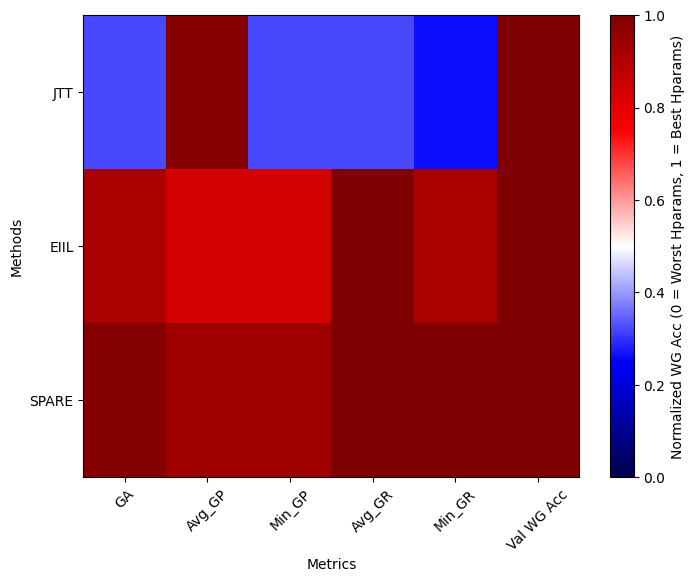

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
data = np.array([
    [21.0, 63.9, 21, 21.0, 17.1, 65.0],
    [77.9, 72.7, 72.7, 83.2, 77.9, 83.2],
    [83.8, 82.5, 82.5, 84.1, 84.1, 84.1]
])

min = [0.0, 20, 60]
max = [65, 83.2, 84.1]

# Create a function to normalize each row separately
def normalize_row(row, min_val, max_val):
    return (row - min_val) / (max_val - min_val)

normalized_data = []
for i, row in enumerate(data):
    normalized_data.append(normalize_row(row, min[i], max[i]))
# Normalize each row separately
normalized_data = np.array(normalized_data)

# Create the heatmap with 'seismic' colormap
plt.figure(figsize=(8, 6))
plt.imshow(normalized_data, cmap='seismic', aspect='auto', vmin=0, vmax=1)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Normalized WG Acc (0 = Worst Hparams, 1 = Best Hparams)')

# Set axis labels and titles
plt.xlabel('Metrics')
plt.ylabel('Methods')

# Show row and column labels
row_labels = ['JTT', 'EIIL', 'SPARE']
col_labels = ['GA', 'Avg_GP', 'Min_GP', 'Avg_GR', 'Min_GR', 'Val WG Acc']
plt.xticks(np.arange(len(col_labels)), col_labels, rotation=45)
plt.yticks(np.arange(len(row_labels)), row_labels)

plt.savefig("gi_tuning.pdf",  bbox_inches='tight')


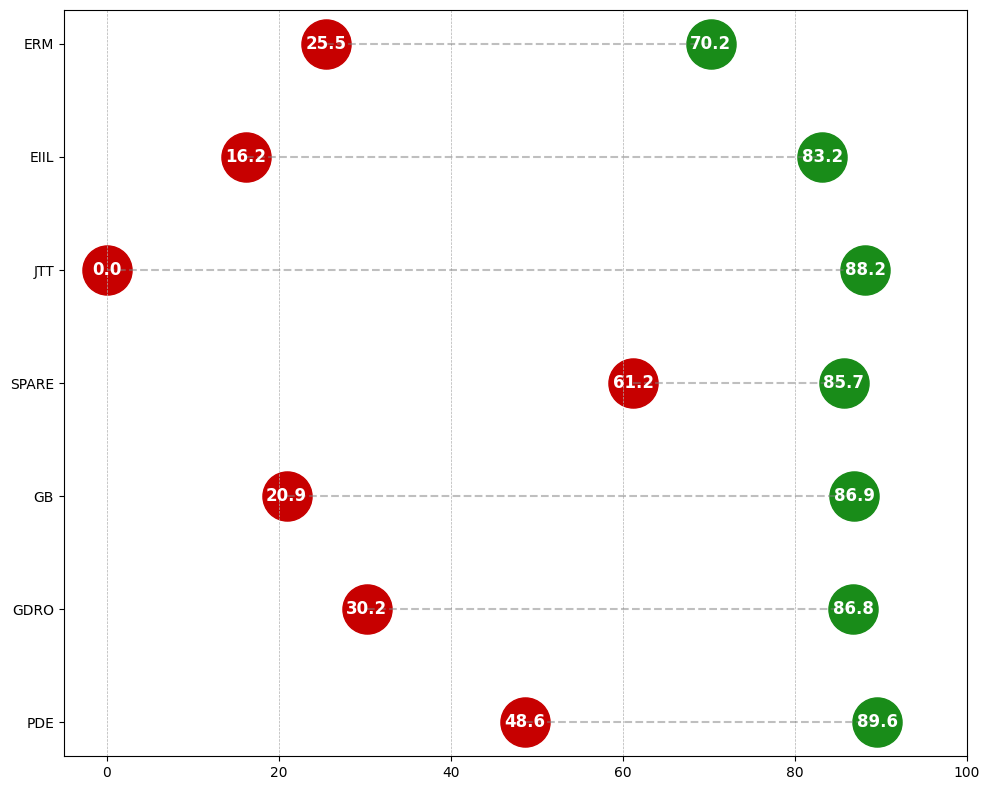

In [98]:
import matplotlib.pyplot as plt

# Data for each school
results_reordered = [[25.5, 70.2], [16.2, 83.2], [0.00, 88.2], [61.2, 85.7], [20.9, 86.9], [30.2, 86.8], [48.6, 89.6]][::-1]
method_names_reordered = ["ERM", "EIIL", "JTT", "SPARE", "GB", "GDRO", "PDE"][::-1]
reorg_data = {}
for i, method_name in enumerate(method_names_reordered):
    reorg_data[method_name] = results_reordered[i]
    
# Define the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# The sizes of the bubbles are assumed to be constant
bubble_size = 1250

# Plotting the bubbles and the lines between them
for i, (school, percentages) in enumerate(reorg_data.items()):
    # Plot the first bubble
    ax.scatter(percentages[0], i, s=bubble_size, color=(199/255, 0, 0, 1))
    ax.text(percentages[0], i, f'{percentages[0]}', fontsize=12, horizontalalignment='center', color="white", verticalalignment='center', weight="bold")
    
    # Plot the second bubble
    ax.scatter(percentages[1], i, s=bubble_size,  color=(25/255, 140/255,25/255))
    ax.text(percentages[1], i, f'{percentages[1]}', fontsize=12, horizontalalignment='center', color="white", verticalalignment='center', weight="bold")
    
    # Draw a line between the bubbles
    ax.plot(percentages, [i, i], color='grey',linestyle='--', alpha=0.5)

# Set the y-axis to display school names
ax.set_yticks(range(len(reorg_data)))
ax.set_yticklabels(reorg_data.keys())

# Set the x-axis limits
ax.set_xlim(-5, 100)

# Add grid
ax.grid(True, which='major', linestyle='--', linewidth=0.5, axis='x')

# Show the plot
plt.tight_layout()
plt.show()
fig.savefig("tuning_single.pdf", bbox_inches="tight")


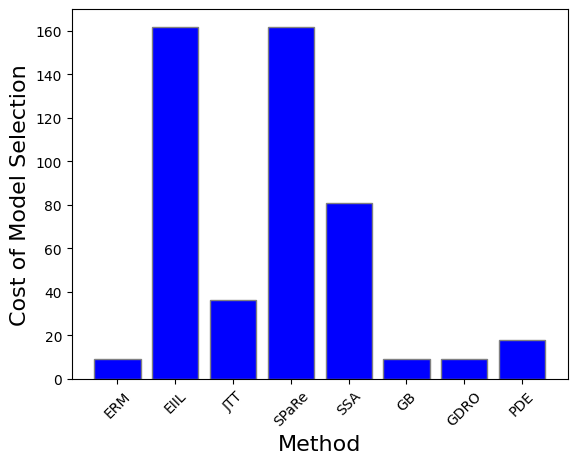

In [186]:
import matplotlib.pyplot as plt

# Adjusted data for only Grid Search Size
methods = ['ERM', 'EIIL', 'JTT', 'SPaRe', 'SSA', 'GB', 'GDRO', 'PDE']
grid_search_sizes = [9, 18*9, 36, 18*9, 9*9, 9, 9, 18]

# Create a simple bar plot
fig, ax = plt.subplots()

# Make the plot
ax.bar(methods, grid_search_sizes, color='b', edgecolor='grey')

# Adding labels
ax.set_xlabel('Method', fontsize=16)
ax.set_ylabel('Cost of Model Selection', fontsize=16)
ax.set_xticks(range(len(methods)))  # This should set the tick locations correctly
ax.set_xticklabels(methods, rotation=45)  # This will rotate the labels to fit better

plt.show()


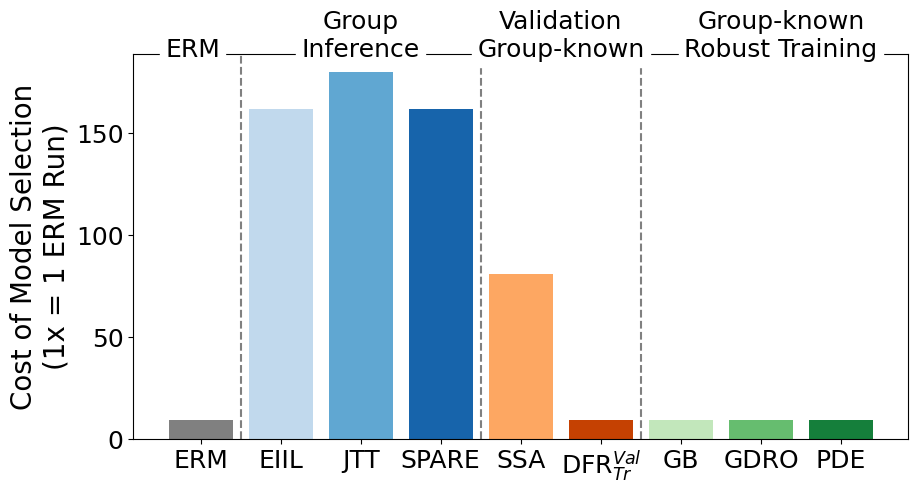

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Adjusted data for only Grid Search Size
# methods = ['ERM', 'EIIL', 'JTT', 'SPaRe', 'SSA', 'GB', 'GDRO', 'PDE']
methods = ['ERM', 'EIIL', 'JTT', 'SPARE', 'SSA', r"DFR$^{Val}_{Tr}$", 'GB', 'GDRO', 'PDE']
grid_search_sizes = [9, 18*9, 36*5, 18*9, 9*9, 9, 9, 9, 9]

# Create a taller bar plot by adjusting the figsize
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the figsize as needed

# Define colors using 'tab20' colormap
colors = color_palette #plt.cm.tab20c(np.arange(len(methods)))

# Make the plot
ax.bar(methods, grid_search_sizes, color=colors)

# Adding labels
ax.set_xlabel('')
ax.set_ylabel('Cost of Model Selection\n(1x = 1 ERM Run)', fontsize=20)
ax.set_xticks(range(len(methods)))  # This should set the tick locations correctly
ax.set_xticklabels(methods, fontsize=18)  # This will rotate the labels to fit better
ax.tick_params(axis='y', labelsize=18)

# Draw vertical lines for dividers
divider_indices = [0.5, 3.5, 5.5]  # Change these indices as per your datasets
for idx in divider_indices:
    ax.axvline(x=idx, color='grey', linestyle='--')

# Add text annotations for categories
category_positions = {'ERM': -0.1, 'Group\nInference': 2, 'Validation\nGroup-known': 4.5, 'Group-known\nRobust Training': 7.25}
for category, pos in category_positions.items():
    ax.text(pos, ax.get_ylim()[1]*0.98, category, ha='center', va='bottom', fontsize=18, backgroundcolor='white')

fig.savefig("model_sel_cost.pdf", bbox_inches="tight")


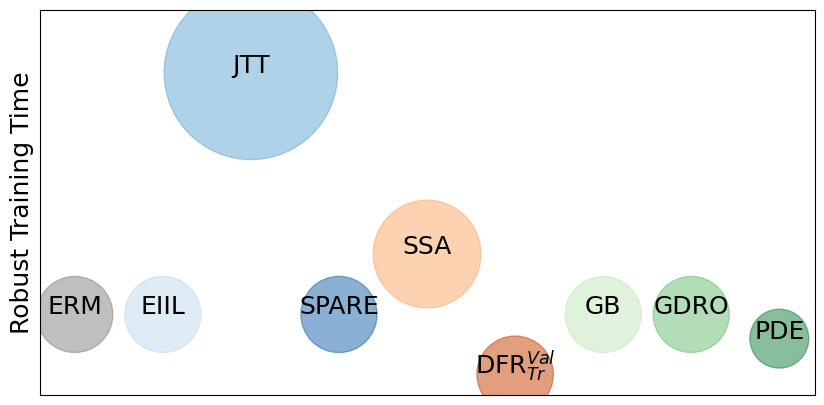

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Methods
methods = ['ERM', 'EIIL', 'JTT', 'SPARE', 'SSA', r"DFR$^{Val}_{Tr}$", 'GB', 'GDRO', 'PDE']

# Indices for methods on the x-axis
x_positions = np.arange(len(methods))

# Synthetic data
group_inference_time = np.array([0, 1/300, 60/300, 1/300, 1/300, 1, 0, 0, 0]) * 3000
robust_training_time = np.array([1, 1, 5, 1, 2, 0.01, 1, 1, 0.6]) * 3000
total_time = group_inference_time + robust_training_time

fig, ax = plt.subplots(figsize=(10, 5))

# Creating the scatter plot with bubble sizes
bubble = ax.scatter(x_positions, robust_training_time, s=total_time, alpha=0.5, color=color_palette)

# Labeling each bubble with the method name
for i, txt in enumerate(methods):
    ax.annotate(txt, (x_positions[i], robust_training_time[i]), textcoords="offset points", xytext=(0,0), ha='center', fontsize=18)
    
# Setting y-axis limits to include the largest bubble
ax.set_ylim(-1000, max(robust_training_time) + .2 * total_time[np.argmax(robust_training_time)])

# Setting the x-axis to show numbers (positions) if necessary
ax.set_xticks(x_positions)
ax.set_xticklabels(['']*len(methods))  # Hide x-tick labels

# Hide the y-axis
ax.set_yticks([])
ax.set_xticks([])

# Setting labels and title
ax.set_xlabel('')
ax.set_ylabel('Robust Training Time', fontsize=18)
# ax.set_title('Bubble Plot of Algorithm Performance')

fig.savefig("cost.pdf", bbox_inches="tight")